## Data visualization for cherry blossoms

In [27]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
fnames = glob.glob('data/*.csv')
print(fnames)

['data/japan.csv', 'data/kyoto.csv', 'data/liestal.csv', 'data/meteoswiss.csv', 'data/south_korea.csv', 'data/washingtondc.csv']


In [29]:
for i, f in enumerate(fnames):
    if i == 0:
        df = pd.read_csv(f)
    else:
        df = pd.concat([df, pd.read_csv(f)],ignore_index=True)

df

,location,lat,long,alt,year,bloom_date,bloom_doy
0,Japan/Wakkanai,45.41500,141.678889,2.85,1953,1953-05-30,150
1,Japan/Wakkanai,45.41500,141.678889,2.85,1954,1954-05-27,147
2,Japan/Wakkanai,45.41500,141.678889,2.85,1955,1955-05-23,143
3,Japan/Wakkanai,45.41500,141.678889,2.85,1956,1956-05-14,135
4,Japan/Wakkanai,45.41500,141.678889,2.85,1957,1957-05-22,142
...,...,...,...,...,...,...,...
15276,washingtondc,38.88535,-77.038628,0.00,2020,2020-03-20,80
15277,washingtondc,38.88535,-77.038628,0.00,2021,2021-03-28,87
15278,washingtondc,38.88535,-77.038628,0.00,2022,2022-03-21,80
15279,washingtondc,38.88535,-77.038628,0.00,2023,2023-03-23,82


In [30]:
len(pd.unique(df['location'])), pd.unique(df['location'])

(329,
 array(['Japan/Wakkanai', 'Japan/Rumoi', 'Japan/Asahikawa',
        'Japan/Abashiri', 'Japan/Sapporo', 'Japan/Iwamizawa',
        'Japan/Obihiro', 'Japan/Kushiro', 'Japan/Nemuro', 'Japan/Muroran',
        'Japan/Urakawa', 'Japan/Esashi', 'Japan/Hakodate', 'Japan/Kutchan',
        'Japan/Mombetsu', 'Japan/Hiroo', 'Japan/Shinjo', 'Japan/Aomori',
        'Japan/Hachinohe', 'Japan/Akita', 'Japan/Morioka', 'Japan/Miyako',
        'Japan/Sakata', 'Japan/Yamagata', 'Japan/Sendai',
        'Japan/Fukushima', 'Japan/Shirakawa', 'Japan/Onahama',
        'Japan/Wajima', 'Japan/Aikawa', 'Japan/Niigata', 'Japan/Kanazawa',
        'Japan/Toyama', 'Japan/Nagano', 'Japan/Takada', 'Japan/Utsunomiya',
        'Japan/Fukui', 'Japan/Takayama', 'Japan/Matsumoto',
        'Japan/Maebashi', 'Japan/Kumagaya', 'Japan/Mito', 'Japan/Tsuruga',
        'Japan/Gifu', 'Japan/Nagoya', 'Japan/Iida', 'Japan/Kofu',
        'Japan/Choshi', 'Japan/Tsu', 'Japan/Hamamatsu', 'Japan/Shizuoka',
        'Japan/Tokyo', 'Ja

Text(0, 0.5, 'Bloom day')

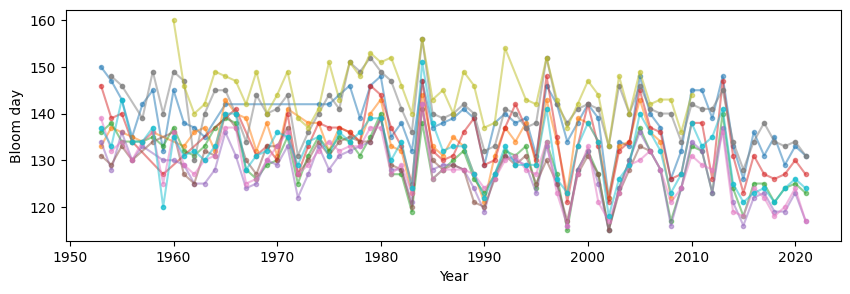

In [31]:
plt.figure(figsize=(10,3))
for loc in pd.unique(df['location'])[:10]:
    plt.plot(df['year'][df['location']==loc],df['bloom_doy'][df['location']==loc],'.-', alpha=0.5, label=loc)
plt.xlabel('Year')
plt.ylabel('Bloom day')

In [32]:
df['country'] = df['location'].str.split('/', expand=True)[0]
df['loc'] = df['location'].str.split('/', expand=True)[1]

df['country'][df['country']=='washingtondc'] = 'USA'
df['loc'][df['country']=='USA'] = 'washingtondc'

df['loc'][df['country']=='kyoto'] = 'kyoto'
df['country'][df['country']=='kyoto'] = 'Japan'

df['loc'][df['country']=='liestal'] = 'liestal'
df['country'][df['country']=='liestal'] = 'Switzerland'


/tmp/ipykernel_22254/1247348885.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['country'][df['country']=='washingtondc'] = 'USA'
/tmp/ipykernel_22254/1247348885.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [33]:
df

,location,lat,long,alt,year,bloom_date,bloom_doy,country,loc
0,Japan/Wakkanai,45.41500,141.678889,2.85,1953,1953-05-30,150,Japan,Wakkanai
1,Japan/Wakkanai,45.41500,141.678889,2.85,1954,1954-05-27,147,Japan,Wakkanai
2,Japan/Wakkanai,45.41500,141.678889,2.85,1955,1955-05-23,143,Japan,Wakkanai
3,Japan/Wakkanai,45.41500,141.678889,2.85,1956,1956-05-14,135,Japan,Wakkanai
4,Japan/Wakkanai,45.41500,141.678889,2.85,1957,1957-05-22,142,Japan,Wakkanai
...,...,...,...,...,...,...,...,...,...
15276,washingtondc,38.88535,-77.038628,0.00,2020,2020-03-20,80,USA,washingtondc
15277,washingtondc,38.88535,-77.038628,0.00,2021,2021-03-28,87,USA,washingtondc
15278,washingtondc,38.88535,-77.038628,0.00,2022,2022-03-21,80,USA,washingtondc
15279,washingtondc,38.88535,-77.038628,0.00,2023,2023-03-23,82,USA,washingtondc


In [34]:
print(pd.unique(df['country']))

['Japan' 'Switzerland' 'South Korea' 'USA']


## plot the cherry blossom day for different locations

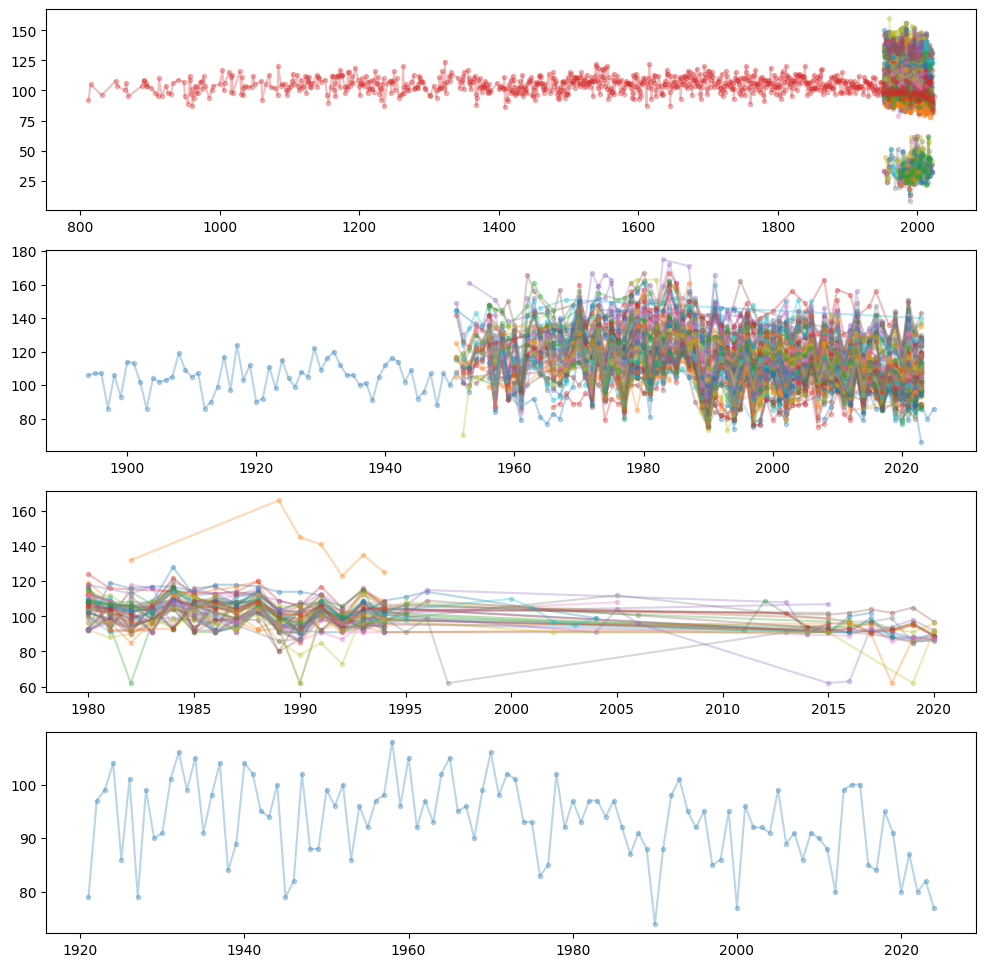

In [35]:
fig, ax = plt.subplots(len(pd.unique(df['country'])),1,figsize=(12,3*len(pd.unique(df['country']))))

for i, c in enumerate(pd.unique(df['country'])):
    df_loc = df[df['country']==c]
    for j, l in enumerate(pd.unique(df_loc['location'])):
        ind = df_loc['location']==l
        ax[i].plot(df_loc['year'][ind],df_loc['bloom_doy'][ind],'.-',alpha=0.3)

Text(0.5, 1.0, 'Kyoto')

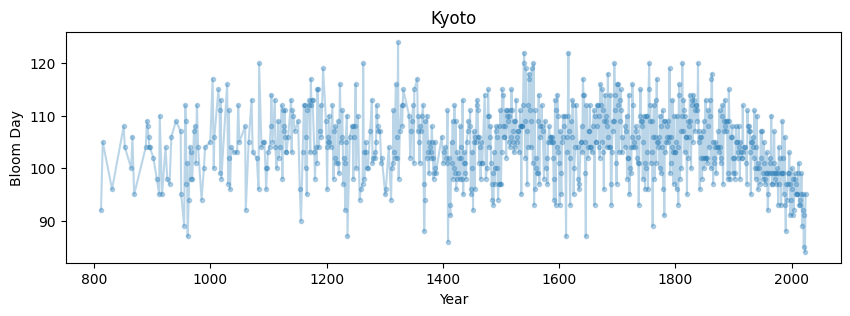

In [36]:
plt.figure(figsize=(10,3))
ind = df['location']=='kyoto'
plt.plot(df['year'][ind],df['bloom_doy'][ind],'.-',alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Bloom Day')
plt.title('Kyoto')

Text(0.5, 1.0, 'liestal')

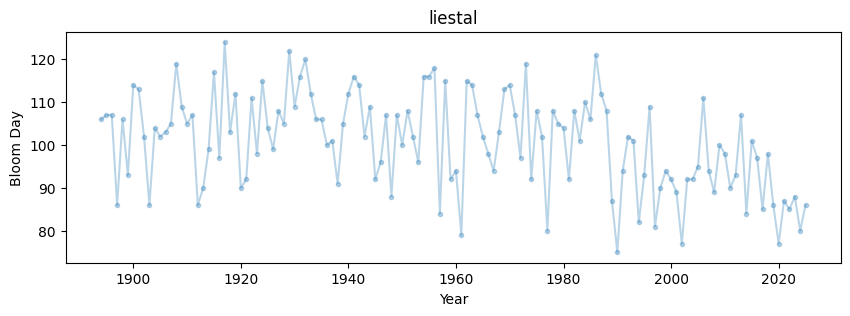

In [37]:
plt.figure(figsize=(10,3))
ind = df['location']=='liestal'
plt.plot(df['year'][ind],df['bloom_doy'][ind],'.-',alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Bloom Day')
plt.title('liestal')

In [40]:
min_year = df_loc['year'][(df_loc['location']!='kyoto')&(df_loc['location']!='liestal')&(df_loc['location']!='washingtondc')].min()
min_year

np.int64(1953)

TypeError: Cannot perform 'rand_' with a dtyped [object] array and scalar of type [bool]

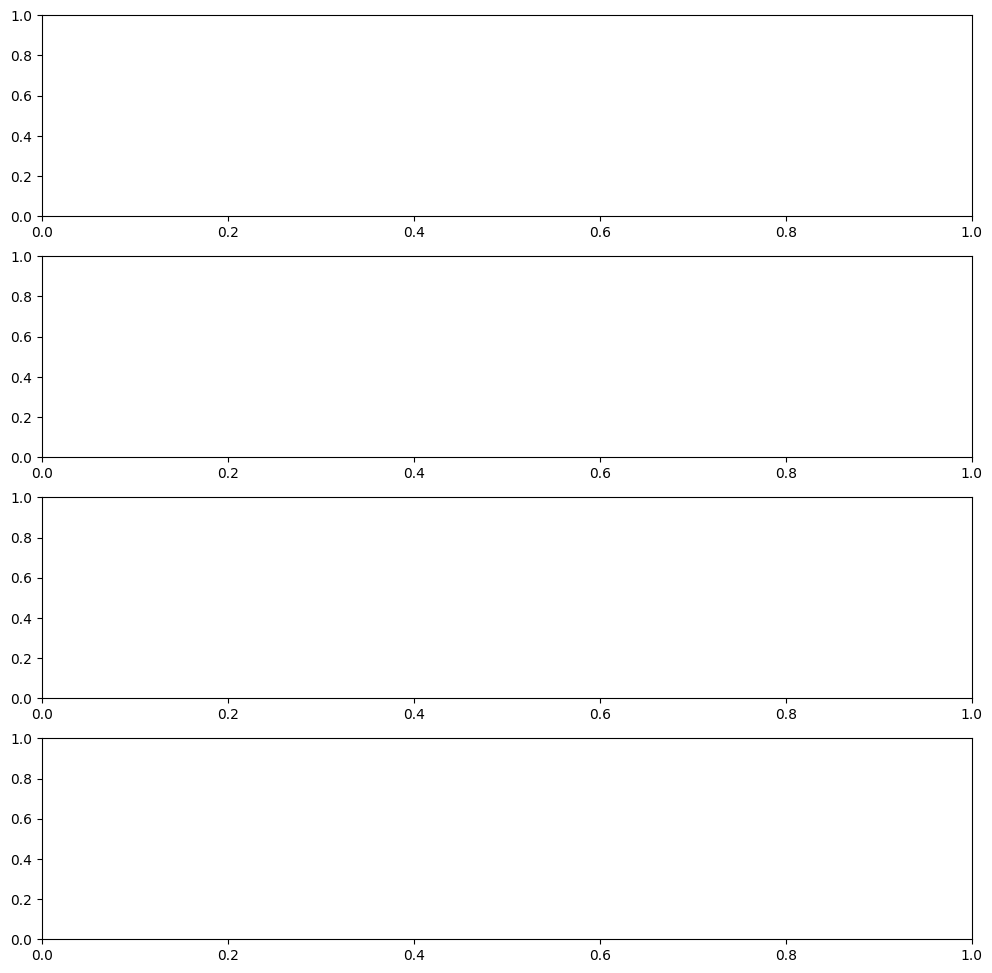

In [38]:
fig, ax = plt.subplots(len(pd.unique(df['country'])),1,figsize=(12,3*len(pd.unique(df['country']))))

for i, c in enumerate(pd.unique(df['country'])):
    
    df_loc = df[df['country']==c]
    
    for j, l in enumerate(pd.unique(df_loc['location'])):
        
        ind = df_loc['location']==l & df_loc['year']>np.min(df_loc['year'][df_loc['location']!='kyoto' or df_loc['location']!='liestal'])
        ax[i].plot(df_loc['year'][ind],df_loc['bloom_doy'][ind],'.-',alpha=0.3)

In [ ]:
df_loc['year'][df_loc['location']!='kyoto'&df_loc['location']!='liestal']